In [7]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as ls 
from tqdm import tqdm
from scipy.signal import find_peaks
import networkx as nx 
from source_file import*


import matplotlib as mpl
mpl.rc('font', size=18)
mpl.rc('legend', fontsize=18)
mpl.rc('legend', numpoints=1)
mpl.rc('legend', handlelength=1.5)
mpl.rc('legend', frameon=False)
#mpl.rc('xtick.major', pad=7)
#mpl.rc('xtick.minor', pad=7)
mpl.rc('lines', lw=2)
mpl.rc('xtick',labelsize =15) 
mpl.rc('ytick',labelsize =15)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [8]:
'''Plotting all the eigenvalues of a hypercube as a function of gamma'''

#parameters
dim = 10
gamma =  np.arange(0,0.6,0.01)
w  = 0
kappa = 0

eigval = np.zeros((len(gamma), 2**dim))

for i in range(len(gamma)):

    #Hamiltonian matrix
    H = hypercube_hamiltonian_networkx(dim,gamma[i],w,kappa)

    #get the eigenvalue and right eigenstates
    eig_val,_ = np.linalg.eigh(H)
    eigval[i] = np.sort(eig_val)

NameError: name 'hypercube_hamiltonian_networkx' is not defined

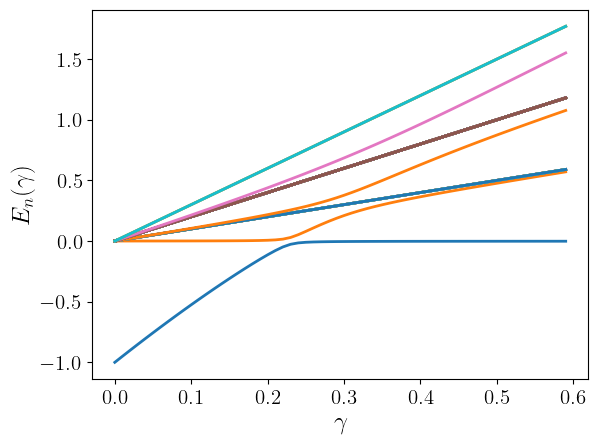

In [11]:
for i in range(len(gamma)):
    plt.plot(gamma,eigval[:,i])

plt.xlabel(r'$\gamma$')
plt.ylabel(r'$E_{n}(\gamma)$')
plt.show()